In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import qgrid
import seaborn as sns

In [3]:
files = {"all": "../../explanations-for-ner-train-finnish-20190114-total.txt",
        "only_target_entities": "../../explanations-for-ner-train-finnish-20190115-total-only_target_entities.txt",
        "finnish_model_100_size": "explanations-for-ner-train-finnish_model_100_size.txt",
        "turkish_model_100_size": "explanations-for-ner-train-turkish_model_100_size.txt"}

In [4]:
lines = []
records = []
with open(files["finnish_model_100_size"], "r") as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.strip().split("\t")
        record = [int(tokens[0]), tokens[1], tuple([int(x) for x in tokens[2].split(" ")])]
        record.append({k: float(v) for k, v in [tuple(x.split(" ")) for x in tokens[3:]]})
        records.append(record)

In [5]:
records[0]

[2,
 'ORG',
 (7, 8),
 {'Case=Nom': -0.010502622802147952,
  'Number=Sing': -0.004358114177939948,
  'Mood=Ind': 0.0006191767266882134,
  'VerbForm=Fin': 0.0006191767266882133,
  '*UNKNOWN*': 0.0006191767266882131,
  'Number=Plur': 0.0006191767266882129,
  'Case=Ill': 0.0006191767266882129,
  'Derivation=Minen': 0.0006191767266882129,
  'NumType=Card': 0.0006191767266882129,
  'Voice=Act': 0.0006191767266882128,
  'Tense=Pres': 0.0006191767266882128,
  'Person=0': 0.0006191767266882128,
  'Case=Ins': 0.0006191767266882128,
  'Degree=Sup': 0.0006191767266882128,
  'Person=3': 0.0006191767266882127,
  'Style=Coll': 0.0006191767266882127,
  'InfForm=1': 0.0006191767266882127,
  'Derivation=Lainen': 0.0006191767266882127,
  'Case=Par': 0.0006191767266882126,
  'PartForm=Past': 0.0006191767266882126,
  'Degree=Pos': 0.0006191767266882125,
  'VerbForm=Part': 0.0006191767266882125,
  'VerbForm=Inf': 0.0006191767266882124,
  'Case=Gen': 0.0006191767266882122}]

In [6]:
list(record[3].values())

[-0.003332256139114007,
 0.0013446283571978222,
 4.847778010183082e-05,
 4.8477780101830806e-05,
 4.84777801018308e-05,
 4.84777801018308e-05,
 4.847778010183079e-05,
 4.847778010183079e-05,
 4.847778010183079e-05,
 4.8477780101830786e-05,
 4.847778010183078e-05,
 4.847778010183078e-05,
 4.847778010183078e-05,
 4.847778010183077e-05,
 4.847778010183077e-05,
 4.847778010183077e-05,
 4.8477780101830766e-05,
 4.8477780101830766e-05,
 4.847778010183076e-05,
 4.847778010183076e-05,
 4.847778010183076e-05,
 4.847778010183076e-05,
 4.847778010183076e-05,
 4.847778010183075e-05,
 4.847778010183075e-05,
 4.847778010183075e-05,
 4.8477780101830745e-05,
 4.8477780101830745e-05,
 4.8477780101830745e-05,
 4.8477780101830745e-05,
 4.847778010183074e-05,
 4.847778010183074e-05,
 4.847778010183074e-05,
 4.847778010183074e-05,
 4.847778010183074e-05,
 4.847778010183073e-05,
 4.8477780101830725e-05,
 4.847778010183072e-05,
 4.8477780101830705e-05,
 4.8477780101830705e-05,
 4.8477780101830705e-05]

In [7]:
def log_sum_exp(input_x):
    max_value = np.max(input_x)
    return np.log(np.sum([np.exp(x-max_value) for x in input_x])) + max_value

log_sum_exp([1, 2])

2.313261687518223

In [8]:
np.logaddexp(*[1, 2])

2.313261687518223

In [9]:
group_by_entity_type = {}
for record in records:
    entity_type = record[1]
    if entity_type not in group_by_entity_type:
        group_by_entity_type[entity_type] = {}
    if entity_type in group_by_entity_type:
        # sum_weights = log_sum_exp(list(record[3].values()))
#         min_value = np.min(list(record[3].values()))
#         max_value = np.max(list(record[3].values()))
        for morpho_tag, weight in record[3].items():
#             value = np.exp(weight - sum_weights)
#             value = (weight-min_value)/float(max_value-min_value)
            value = weight
            if morpho_tag in group_by_entity_type[entity_type]:
                group_by_entity_type[entity_type][morpho_tag].append(value)
            else:
                group_by_entity_type[entity_type][morpho_tag] = [value]

In [10]:
group_by_entity_type.keys()

dict_keys(['ORG', 'TIT', 'PER', 'TIM', 'LOC', 'DATE', 'PRO', 'MISC', 'EVENT', 'OUTSIDE'])

In [11]:
group_by_entity_type['ORG'].keys()

dict_keys(['Case=Nom', 'Number=Sing', 'Mood=Ind', 'VerbForm=Fin', '*UNKNOWN*', 'Number=Plur', 'Case=Ill', 'Derivation=Minen', 'NumType=Card', 'Voice=Act', 'Tense=Pres', 'Person=0', 'Case=Ins', 'Degree=Sup', 'Person=3', 'Style=Coll', 'InfForm=1', 'Derivation=Lainen', 'Case=Par', 'PartForm=Past', 'Degree=Pos', 'VerbForm=Part', 'VerbForm=Inf', 'Case=Gen', 'Mood=Imp', 'Derivation=Vs', 'Case=Ess', 'Foreign=Yes', 'Case=Ela', 'Person=2', 'PronType=Prs', 'Person[psor]=3', 'Tense=Past', 'Voice=Pass', 'Person=1', 'Case=Ade', 'Connegative=Yes', 'PartForm=Agt', 'PronType=Ind', 'Typo=Yes', 'Case=Ine', 'PartForm=Pres', 'AdpType=Post', 'Case=Tra', 'InfForm=2', 'NumType=Ord', 'PronType=Rel', 'Number[psor]=Sing', 'Derivation=Sti', 'Person[psor]=2', 'Case=All', 'AdpType=Prep', 'InfForm=3', 'Clitic=Kaan', 'Degree=Cmp', 'Polarity=Neg', 'PronType=Dem', 'Abbr=Yes', 'Derivation=Inen', 'Case=Abl', 'Person[psor]=1', 'Number[psor]=Plur', 'Clitic=Ko', 'Derivation=Ttain', 'Clitic=S', 'Clitic=Pa,S', 'Mood=Cnd', 'D

In [12]:
stats_by_entity_type = {key: dict() for key in group_by_entity_type.keys()}
for entity_type in stats_by_entity_type.keys():
    for morpho_tag in group_by_entity_type[entity_type]:
        l = group_by_entity_type[entity_type][morpho_tag]
        stats_by_entity_type[entity_type][morpho_tag] = (np.mean(l), len(l))

In [13]:
for entity_type in stats_by_entity_type.keys():
    sorted_l = sorted(stats_by_entity_type[entity_type].items(), key=lambda x: np.abs(x[1][0]), reverse=True)
    print(entity_type, sorted_l[:10])

ORG [('Number=Sing', (-0.0018243359673803037, 9101)), ('Case=Nom', (-0.00169143605762386, 9099)), ('Clitic=Kin', (0.0007266414128715322, 862)), ('Case=Ade', (-0.000664262656997685, 2473)), ('Derivation=U', (0.00023974709551593116, 34)), ('Mood=Cnd', (-0.00022722570713425461, 844)), ('Polarity=Neg', (0.0002257937713159162, 1638)), ('Derivation=Ttain', (0.0002093495640021931, 70)), ('Case=Gen', (0.00020420728950180283, 8722)), ('Derivation=Ja', (0.0002039334789717421, 258))]
TIT [('Number=Sing', (0.020895782766916414, 631)), ('Case=Nom', (0.008101013736644323, 631)), ('Case=Abl', (-0.002264198947223181, 44)), ('Case=Par', (-0.001416601741647547, 575)), ('*UNKNOWN*', (-0.0013867442428477895, 631)), ('Case=Com', (-0.0013723381114265011, 2)), ('Person[psor]=2', (-0.0012657431726888217, 40)), ('Reflex=Yes', (-0.0012464186747703544, 32)), ('Number=Plur', (-0.0011238883528869367, 617)), ('Number[psor]=Sing', (-0.001092229559817878, 54))]
PER [('Clitic=Ko,S', (-0.013427603525183102, 7)), ('Numb

In [14]:
all_morpho_tags = set()
for record in records:
    all_morpho_tags.update(set(record[3].keys()))
all_morpho_tags
morpho_tag_to_id = {m: idx for idx, m in enumerate(all_morpho_tags)}
morpho_tag_to_id

{'NumType=Card': 0,
 'VerbForm=Inf': 1,
 'Clitic=S': 2,
 'PronType=Rcp': 3,
 'Case=Ela': 4,
 'Number=Plur': 5,
 'Typo=Yes': 6,
 'Clitic=Ko,S': 7,
 'Person=1': 8,
 'Number[psor]=Plur': 9,
 'PartForm=Agt': 10,
 'Clitic=Ko': 11,
 'Person[psor]=1': 12,
 'Clitic=Kin': 13,
 'Case=Acc': 14,
 'PartForm=Past': 15,
 'Degree=Sup': 16,
 'AdpType=Post': 17,
 'Derivation=Lainen': 18,
 'Mood=Pot': 19,
 'Derivation=Vs': 20,
 'Mood=Cnd': 21,
 'Person=3': 22,
 'Reflex=Yes': 23,
 'Clitic=Pa': 24,
 'Case=Tra': 25,
 'Degree=Cmp': 26,
 'PronType=Int': 27,
 'Person=0': 28,
 'Derivation=Ton': 29,
 'Mood=Imp': 30,
 'InfForm=2': 31,
 'PronType=Prs': 32,
 'Derivation=Sti': 33,
 'Case=Ade': 34,
 'VerbForm=Part': 35,
 'Derivation=Inen': 36,
 'PartForm=Neg': 37,
 'Voice=Pass': 38,
 'PronType=Ind': 39,
 'Derivation=U': 40,
 'Derivation=Ttain': 41,
 'Derivation=Minen': 42,
 'Connegative=Yes': 43,
 'Style=Coll': 44,
 'Case=Par': 45,
 'Polarity=Neg': 46,
 'NumType=Ord': 47,
 'Clitic=Kaan': 48,
 'Case=Com': 49,
 'Abbr=Y

In [15]:
record

[15434,
 'LOC',
 (13, 14),
 {'Number=Sing': -0.003332256139114007,
  'Case=Gen': 0.0013446283571978222,
  'PartForm=Past': 4.847778010183082e-05,
  'VerbForm=Inf': 4.8477780101830806e-05,
  'Person=3': 4.84777801018308e-05,
  'Person=2': 4.84777801018308e-05,
  'Style=Coll': 4.847778010183079e-05,
  'VerbForm=Part': 4.847778010183079e-05,
  'Connegative=Yes': 4.847778010183079e-05,
  'Person=1': 4.8477780101830786e-05,
  'Person=0': 4.847778010183078e-05,
  'Person[psor]=3': 4.847778010183078e-05,
  'PronType=Dem': 4.847778010183078e-05,
  'Case=Par': 4.847778010183077e-05,
  'Tense=Past': 4.847778010183077e-05,
  'Mood=Cnd': 4.847778010183077e-05,
  'Case=Ill': 4.8477780101830766e-05,
  'Voice=Pass': 4.8477780101830766e-05,
  'VerbForm=Fin': 4.847778010183076e-05,
  'Tense=Pres': 4.847778010183076e-05,
  'InfForm=1': 4.847778010183076e-05,
  'Derivation=Minen': 4.847778010183076e-05,
  'InfForm=2': 4.847778010183076e-05,
  'Mood=Ind': 4.847778010183075e-05,
  'Number=Plur': 4.84777801

In [16]:
records_for_panda = []
for record in records:
    record_pre_panda = [record[0], record[1], record[2][0], record[2][1]]
    morpho_tags = [None] * len(morpho_tag_to_id)
    for morpho_tag, idx in morpho_tag_to_id.items():
        if morpho_tag in record[3]:
            morpho_tags[idx] = record[3][morpho_tag]
    record_pre_panda += morpho_tags
    records_for_panda.append(record_pre_panda)
#     print(record_pre_panda)

In [17]:
id_to_morpho_tag = {idx: morpho_tag for morpho_tag, idx in morpho_tag_to_id.items()}
column_names = ['sentence_idx', 'entity_type', 'entity_start', 'entity_end']
column_names += [id_to_morpho_tag[x] for x in range(len(morpho_tag_to_id))]
explanations = pd.DataFrame(records_for_panda, columns=column_names)

In [18]:
explanations

,sentence_idx,entity_type,entity_start,entity_end,NumType=Card,VerbForm=Inf,Clitic=S,PronType=Rcp,Case=Ela,Number=Plur,...,Case=Ess,Tense=Past,Case=All,AdpType=Prep,Case=Abl,Number=Sing,Case=Ine,PronType=Rel,Person=2,Case=Nom
0,2,ORG,7,8,6.191767e-04,6.191767e-04,NaN,NaN,NaN,6.191767e-04,...,NaN,NaN,NaN,NaN,NaN,-0.004358,NaN,NaN,NaN,-1.050262e-02
1,2,ORG,15,16,1.085237e-03,1.085237e-03,NaN,NaN,NaN,1.085237e-03,...,NaN,NaN,NaN,NaN,NaN,-0.006487,NaN,NaN,NaN,1.085237e-03
2,3,ORG,1,2,5.432239e-07,5.432239e-07,NaN,NaN,5.432239e-07,5.432239e-07,...,5.432239e-07,5.432239e-07,NaN,NaN,NaN,-0.000010,NaN,NaN,5.432239e-07,5.432239e-07
3,3,TIT,2,3,-8.744889e-04,-8.744889e-04,NaN,NaN,-8.744889e-04,-8.744889e-04,...,-8.744889e-04,-8.744889e-04,NaN,NaN,NaN,0.017836,NaN,NaN,-8.744889e-04,1.014867e-02
4,3,TIT,4,5,-3.022270e-04,-3.022270e-04,NaN,NaN,-3.022270e-04,-3.022270e-04,...,-3.022270e-04,-3.022270e-04,NaN,NaN,NaN,0.006083,NaN,NaN,-3.022270e-04,3.588459e-03
5,3,PER,5,7,1.730456e-04,1.730456e-04,NaN,NaN,1.730456e-04,1.730456e-04,...,1.730456e-04,1.730456e-04,NaN,NaN,NaN,-0.005665,NaN,NaN,1.730456e-04,1.277493e-04
6,3,TIM,8,9,5.131101e-05,5.131101e-05,NaN,NaN,5.131101e-05,-1.335760e-03,...,1.080837e-03,5.131101e-05,NaN,NaN,NaN,-0.001336,NaN,NaN,5.131101e-05,5.131101e-05
7,3,ORG,12,13,5.709021e-05,5.709021e-05,NaN,NaN,1.335920e-04,5.709021e-05,...,5.709021e-05,5.709021e-05,NaN,NaN,NaN,-0.001961,NaN,NaN,5.709021e-05,5.709021e-05
8,5,ORG,0,1,NaN,-4.173099e-04,NaN,NaN,NaN,-4.173099e-04,...,NaN,NaN,NaN,NaN,NaN,-0.001110,NaN,NaN,NaN,-4.173099e-04
9,5,ORG,5,6,NaN,1.782648e-05,NaN,NaN,NaN,1.782648e-05,...,NaN,NaN,NaN,NaN,NaN,-0.000126,NaN,NaN,NaN,1.782648e-05


In [19]:
df_by_entity_type = explanations.groupby('entity_type')

In [29]:
explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type').mean()

,NumType=Card,VerbForm=Inf,Clitic=S,PronType=Rcp,Case=Ela,Number=Plur,Typo=Yes,"Clitic=Ko,S",Person=1,Number[psor]=Plur,...,Case=Ess,Tense=Past,Case=All,AdpType=Prep,Case=Abl,Number=Sing,Case=Ine,PronType=Rel,Person=2,Case=Nom
entity_type,,,,,,,,,,,,,,,,,,,,,
DATE,0.000243,-0.000020,1.759956e-05,-1.251933e-06,-0.000136,-0.000026,-0.000011,-0.000039,-0.000069,0.000006,...,-0.000003,-0.000016,0.000032,0.000002,0.000044,0.000023,-0.000034,-0.000042,-0.000022,-0.000032
EVENT,0.000434,0.000233,6.750580e-05,NaN,0.000360,-0.004076,0.000567,NaN,0.000378,0.001015,...,0.000274,0.000233,0.002339,0.000137,0.000110,-0.001820,-0.000550,0.000095,0.000357,-0.000891
LOC,-0.000114,-0.000034,2.754728e-05,-1.303589e-04,0.002016,0.000114,-0.000120,-0.000065,-0.000080,-0.001211,...,-0.000020,-0.000022,0.000543,-0.000020,-0.000124,-0.003007,0.003041,0.000062,0.000047,-0.001634
MISC,-0.000188,-0.000219,-2.057708e-04,-7.111102e-05,-0.001290,0.002629,-0.000240,0.000002,-0.000222,-0.000226,...,-0.000241,-0.000190,-0.001233,-0.000190,-0.000618,0.003277,-0.002276,-0.000133,-0.000205,0.000636
ORG,0.000158,0.000136,1.044348e-04,1.091564e-04,-0.000015,-0.000034,0.000169,0.000109,0.000124,0.000158,...,0.000131,0.000155,0.000176,0.000135,-0.000087,-0.001824,-0.000061,-0.000129,0.000128,-0.001691
OUTSIDE,0.000004,-0.000039,-8.992892e-09,-8.992892e-09,-0.000098,-0.000039,0.000001,NaN,-0.000039,NaN,...,-0.000098,-0.000048,NaN,0.000001,NaN,-0.000442,-0.000030,-0.000015,-0.000054,0.001758
PER,-0.000331,-0.000265,-4.144978e-04,-2.355786e-04,-0.000384,-0.000398,-0.000294,-0.013428,-0.000286,-0.000413,...,-0.000341,-0.000323,-0.000380,-0.000282,-0.000651,0.007034,-0.000322,-0.000336,-0.000298,0.003130
PRO,-0.000169,-0.000024,1.855918e-05,7.086433e-05,0.000916,0.000588,-0.000011,0.000073,0.000023,0.000053,...,0.000015,-0.000044,-0.000067,-0.000009,0.000144,-0.003136,0.000562,-0.000019,-0.000008,0.000874
TIM,-0.000094,-0.000199,-1.031575e-04,-3.715995e-04,-0.000059,-0.000393,-0.000177,-0.001262,-0.000172,-0.000243,...,0.005344,-0.000090,-0.000295,-0.000230,0.000061,-0.001587,0.001005,-0.000162,-0.000121,-0.000396


In [30]:
means_over_entity_type = explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type').mean()

In [31]:
%matplotlib inline

In [35]:
means_over_entity_type.index

Index(['DATE', 'EVENT', 'LOC', 'MISC', 'ORG', 'OUTSIDE', 'PER', 'PRO', 'TIM',
       'TIT'],
      dtype='object', name='entity_type')

In [36]:
means_over_entity_type.corr()

,NumType=Card,VerbForm=Inf,Clitic=S,PronType=Rcp,Case=Ela,Number=Plur,Typo=Yes,"Clitic=Ko,S",Person=1,Number[psor]=Plur,...,Case=Ess,Tense=Past,Case=All,AdpType=Prep,Case=Abl,Number=Sing,Case=Ine,PronType=Rel,Person=2,Case=Nom
NumType=Card,1.000000,0.950135,0.899263,0.884642,0.289985,-0.251137,0.953501,0.225631,0.937526,0.663462,...,0.160977,0.947616,0.722299,0.928066,0.877231,-0.842418,0.102042,0.876210,0.941335,-0.858501
VerbForm=Inf,0.950135,1.000000,0.948870,0.953538,0.461303,-0.187586,0.971145,0.198696,0.983511,0.587851,...,0.068403,0.974581,0.733662,0.985970,0.911449,-0.910563,0.221170,0.923578,0.982349,-0.892542
Clitic=S,0.899263,0.948870,1.000000,0.887536,0.530009,-0.027349,0.880477,0.420630,0.911521,0.443742,...,0.180778,0.953215,0.611311,0.959874,0.935389,-0.961204,0.350069,0.940820,0.934039,-0.921339
PronType=Rcp,0.884642,0.953538,0.887536,1.000000,0.304415,0.504942,0.953095,0.131356,0.950613,0.501155,...,-0.081529,0.875946,0.539381,0.968982,0.867861,-0.871879,0.102833,0.894485,0.908878,-0.810084
Case=Ela,0.289985,0.461303,0.530009,0.304415,1.000000,-0.214359,0.370232,0.195154,0.434536,-0.191497,...,0.038250,0.459243,0.552044,0.446238,0.494997,-0.553714,0.896003,0.540587,0.516581,-0.489205
Number=Plur,-0.251137,-0.187586,-0.027349,0.504942,-0.214359,1.000000,-0.360202,0.267057,-0.302855,-0.491594,...,-0.064131,-0.259706,-0.773371,-0.035978,-0.022579,-0.058097,-0.117137,-0.012605,-0.298553,-0.042667
Typo=Yes,0.953501,0.971145,0.880477,0.953095,0.370232,-0.360202,1.000000,0.186876,0.993785,0.733789,...,0.090228,0.962833,0.821846,0.926545,0.852530,-0.831294,0.103404,0.869874,0.977572,-0.813581
"Clitic=Ko,S",0.225631,0.198696,0.420630,0.131356,0.195154,0.267057,0.186876,1.000000,0.222502,0.109421,...,0.103920,0.383469,0.106093,0.181946,0.159846,-0.270006,0.120572,0.278339,0.292244,-0.307695
Person=1,0.937526,0.983511,0.911521,0.950613,0.434536,-0.302855,0.993785,0.222502,1.000000,0.686645,...,0.092202,0.973207,0.798983,0.946662,0.878437,-0.870942,0.162494,0.894617,0.987546,-0.843256
Number[psor]=Plur,0.663462,0.587851,0.443742,0.501155,-0.191497,-0.491594,0.733789,0.109421,0.686645,1.000000,...,0.058675,0.613879,0.586667,0.504667,0.442820,-0.350356,-0.451031,0.391484,0.598147,-0.320656


In [25]:
means_over_entity_type['Ins^DB'].mean()

-0.0008157073382951142

In [27]:
means_over_entity_type[means_over_entity_type.columns[0]].mean()

-0.0004747726744215907

In [37]:
explanations_grid = qgrid.show_grid(means_over_entity_type.corr().iloc[:, 0:2], show_toolbar=True)
explanations_grid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [38]:
df_by_entity_type = explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type')

In [39]:
explanations[explanations['entity_type'] == "LOC"]

,sentence_idx,entity_type,entity_start,entity_end,NumType=Card,VerbForm=Inf,Clitic=S,PronType=Rcp,Case=Ela,Number=Plur,...,Case=Ess,Tense=Past,Case=All,AdpType=Prep,Case=Abl,Number=Sing,Case=Ine,PronType=Rel,Person=2,Case=Nom
14,7,LOC,7,8,0.000040,3.973426e-05,NaN,NaN,NaN,3.973426e-05,...,NaN,3.973426e-05,NaN,NaN,NaN,-1.652063e-03,0.000040,0.000040,0.000040,3.973426e-05
28,11,LOC,4,5,0.000038,3.811773e-05,NaN,NaN,NaN,3.811773e-05,...,NaN,3.811773e-05,0.000038,0.000038,NaN,-1.190647e-03,NaN,NaN,NaN,3.811773e-05
94,44,LOC,5,6,NaN,-1.219126e-05,NaN,NaN,NaN,4.423805e-04,...,NaN,-1.219126e-05,NaN,NaN,-0.000012,-1.219126e-05,NaN,-0.000012,-0.000012,-1.219126e-05
143,65,LOC,1,2,NaN,-6.121374e-05,NaN,NaN,NaN,9.714705e-04,...,-0.000061,-6.121374e-05,NaN,NaN,NaN,-6.121374e-05,NaN,NaN,NaN,-6.121374e-05
162,76,LOC,1,2,-0.000046,-4.561658e-05,NaN,NaN,NaN,-4.561658e-05,...,NaN,-4.561658e-05,NaN,NaN,NaN,1.700284e-05,0.001123,NaN,NaN,-4.561658e-05
163,76,LOC,8,9,-0.003308,-3.307737e-03,NaN,NaN,NaN,-3.307737e-03,...,NaN,-3.307737e-03,NaN,NaN,NaN,1.415370e-02,0.068542,NaN,NaN,-3.307737e-03
164,78,LOC,4,5,NaN,-2.308024e-05,NaN,NaN,-0.000023,-2.308024e-05,...,NaN,-2.308024e-05,NaN,-0.000023,NaN,-3.925643e-05,0.000709,NaN,NaN,-2.308024e-05
166,79,LOC,3,4,-0.000043,-4.290041e-05,NaN,NaN,NaN,-4.290041e-05,...,NaN,-4.290041e-05,NaN,-0.000043,NaN,-1.277733e-04,0.001672,NaN,NaN,-4.290041e-05
168,79,LOC,13,14,-0.000024,-2.372364e-05,NaN,NaN,NaN,3.235133e-04,...,NaN,-2.372364e-05,NaN,-0.000024,NaN,-2.372364e-05,0.000531,NaN,NaN,-2.372364e-05
169,80,LOC,1,2,0.000102,1.024827e-04,NaN,NaN,NaN,1.024827e-04,...,0.000102,1.024827e-04,NaN,NaN,NaN,-2.870093e-03,NaN,NaN,NaN,1.024827e-04


# LOC type entities - analysis

In [40]:
loc_group_explanations = explanations[explanations['entity_type'] == "LOC"].drop(["sentence_idx", "entity_type", "entity_start", "entity_end"], axis=1)

In [42]:
loc_group_explanations.columns

Index(['NumType=Card', 'VerbForm=Inf', 'Clitic=S', 'PronType=Rcp', 'Case=Ela',
       'Number=Plur', 'Typo=Yes', 'Clitic=Ko,S', 'Person=1',
       'Number[psor]=Plur', 'PartForm=Agt', 'Clitic=Ko', 'Person[psor]=1',
       'Clitic=Kin', 'Case=Acc', 'PartForm=Past', 'Degree=Sup', 'AdpType=Post',
       'Derivation=Lainen', 'Mood=Pot', 'Derivation=Vs', 'Mood=Cnd',
       'Person=3', 'Reflex=Yes', 'Clitic=Pa', 'Case=Tra', 'Degree=Cmp',
       'PronType=Int', 'Person=0', 'Derivation=Ton', 'Mood=Imp', 'InfForm=2',
       'PronType=Prs', 'Derivation=Sti', 'Case=Ade', 'VerbForm=Part',
       'Derivation=Inen', 'PartForm=Neg', 'Voice=Pass', 'PronType=Ind',
       'Derivation=U', 'Derivation=Ttain', 'Derivation=Minen',
       'Connegative=Yes', 'Style=Coll', 'Case=Par', 'Polarity=Neg',
       'NumType=Ord', 'Clitic=Kaan', 'Case=Com', 'Abbr=Yes', 'PronType=Dem',
       'Clitic=Han,Ko', 'Clitic=Ka', 'VerbForm=Fin', 'Case=Ill', 'InfForm=3',
       'Person[psor]=3', 'Style=Arch', 'Number[psor]=Sing'

In [41]:
loc_group_explanations['Loc'].clip(lower=-1.0, upper=1, inplace=False)

KeyError: 'Loc'

In [43]:
len(morpho_tag_to_id)

85

In [44]:
loc_group_explanations.size

173400

PresPart^DB
21      -0.008587
24      -0.009110
73      -0.003479
74      -0.000344
147      0.004382
149     -0.002825
168     -0.000391
171     -0.000023
172     -0.000043
175     -0.000079
187     -0.000077
395     -0.000099
606     -0.001537
671     -0.000017
816     -0.000031
817     -0.000114
897     -0.000120
902     -0.000255
904     -0.000944
907     -0.000052
908     -0.000017
909     -0.000082
1074    -0.005958
1116    -0.001389
1195     0.000002
1199    -0.000074
1309     0.000049
1342    -0.000147
1343    -0.000311
1573    -0.001537
           ...   
20566   -0.000271
20598   -0.004956
20599   -0.000125
20672   -0.002027
20844   -0.000048
21064   -0.000147
21065   -0.000190
21066    0.000126
21073   -0.000319
21074    0.000190
21145   -0.002429
21388   -0.005242
21396    0.000023
21478   -0.000811
21480   -0.002993
21561   -0.000265
21566   -0.000009
21739   -0.000761
21896   -0.000319
21901   -0.000012
21906   -0.002408
21966    0.000051
21969    0.000132
21970   -0.00020

ValueError: `dataset` input should have multiple elements.

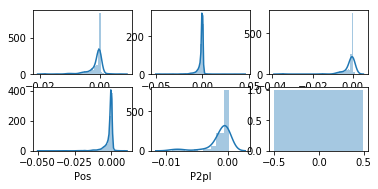

In [35]:
for idx, morpho_tag in enumerate(list(morpho_tag_to_id.keys())):
    if idx % 9 == 0:
        fig = plt.figure(int(idx/9))
    rem = idx % 9
    plt.subplot(3, 3, rem+1)
    print(morpho_tag)
#     sns.violinplot(data=list(loc_group_explanations[morpho_tag].clip(lower=-0.5, upper=0.5)))
    data = loc_group_explanations[morpho_tag].dropna().clip(lower=-0.5, upper=0.5)
    print(data)
    if data.size > 0:
        sns.distplot(data)
plt.show()

In [36]:
loc_group_explanations

,PresPart^DB,Acc,Real,Pos,P2pl,Stay^DB,Dim,Imp,PCGen,Pos^DB,...,Stay,NotState,Real^DB,Loc^DB,Pers,Ratio,Ins,Recip,Prop,PersP
1,NaN,-0.000343,NaN,-0.000343,NaN,NaN,NaN,-0.000343,NaN,-0.000343,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.000343,NaN,0.011976,NaN
2,NaN,0.000100,NaN,0.000100,NaN,NaN,NaN,0.000100,NaN,0.000100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000027,NaN
3,NaN,-0.018088,NaN,-0.018088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211969,NaN
5,NaN,-0.000048,NaN,-0.000048,NaN,NaN,NaN,NaN,NaN,-0.000048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001386,NaN
6,NaN,-0.000050,NaN,-0.000050,NaN,NaN,NaN,NaN,NaN,-0.000050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001713,NaN
7,NaN,-0.001368,NaN,-0.001368,NaN,NaN,NaN,NaN,NaN,-0.001368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042216,NaN
8,NaN,-0.000158,NaN,-0.000158,NaN,NaN,NaN,NaN,NaN,-0.000158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004216,NaN
9,NaN,-0.000837,NaN,-0.000837,NaN,NaN,NaN,NaN,NaN,-0.000837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025421,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001784,NaN
15,NaN,-0.008288,NaN,-0.008288,NaN,NaN,NaN,NaN,NaN,-0.008288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116027,NaN


In [45]:
mean_loc_group_explanations = loc_group_explanations.mean()

In [46]:
mean_loc_group_explanations.sort_values(ascending=False)

Clitic=Han           0.014738
Case=Ine             0.003041
Case=Ela             0.002016
Case=Gen             0.001760
Case=Ade             0.001099
Case=Ill             0.000703
Case=All             0.000543
Clitic=Ka            0.000339
*UNKNOWN*            0.000330
Case=Par             0.000263
Degree=Sup           0.000214
Clitic=Pa            0.000169
AdpType=Post         0.000164
Derivation=Ttain     0.000155
Derivation=Ton       0.000150
Degree=Cmp           0.000134
Number[psor]=Sing    0.000121
Number=Plur          0.000114
Clitic=Ko            0.000113
Person[psor]=3       0.000093
PronType=Dem         0.000081
Mood=Imp             0.000069
PronType=Rel         0.000062
Person=2             0.000047
Derivation=Inen      0.000041
InfForm=3            0.000036
Polarity=Neg         0.000030
Clitic=S             0.000028
InfForm=2            0.000026
Foreign=Yes          0.000025
                       ...   
Tense=Pres          -0.000065
Case=Abe            -0.000067
VerbForm=F

In [39]:
loc_group_explanations['Loc'].sort_values()[:10]

5354    -0.053045
19424   -0.048364
16613   -0.046426
10436   -0.041370
6503    -0.037810
13573   -0.035518
18812   -0.033537
8799    -0.031651
2068    -0.021226
18643   -0.020892
Name: Loc, dtype: float64

In [40]:
loc_group_explanations['Loc'].sort_values(ascending=False)[:10]

12190    0.226137
12468    0.209549
14743    0.180590
16771    0.180451
17499    0.180451
10319    0.173254
1665     0.133967
7508     0.130966
17138    0.104637
20407    0.102134
Name: Loc, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cf90da0>]],
      dtype=object)

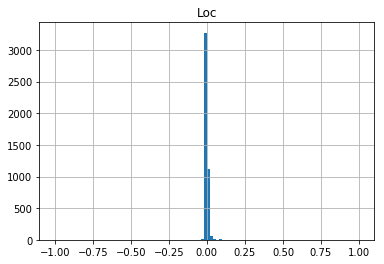

In [43]:
loc_group_explanations.hist(['Loc'], range=[-1, 1], bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cf99a20>]],
      dtype=object)

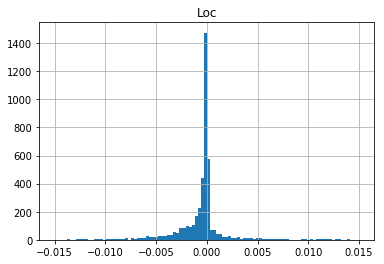

In [48]:
loc_group_explanations.hist(['Loc'], range=[-0.015, 0.015], bins=100)

In [69]:
loc_group_explanations['Loc'].value_counts().sort_values(ascending=False)

 3.864043e-03    4
 3.241734e-03    4
-6.119342e-05    2
 4.310615e-05    2
 1.375757e-03    2
-2.785775e-05    2
-2.118100e-04    2
-8.958014e-05    2
-2.183714e-04    2
-1.748451e-02    2
-1.612431e-03    2
 3.942213e-06    2
-2.728251e-04    2
-1.005967e-03    2
-2.521092e-04    2
 2.118214e-03    2
-2.226804e-04    2
 2.173822e-03    2
-4.444699e-05    2
 3.033458e-02    2
 1.654812e-03    2
-2.588910e-04    2
-5.718875e-04    2
-6.772747e-03    2
 2.133256e-06    2
-1.027175e-04    2
-1.022416e-05    2
-3.105809e-03    2
-1.257856e-03    2
-2.895252e-05    2
                ..
 6.254161e-04    1
-5.556325e-04    1
-5.914780e-04    1
-5.344973e-05    1
-1.257218e-03    1
-2.117192e-04    1
-7.002296e-03    1
-1.156744e-03    1
-8.145127e-05    1
 8.828563e-07    1
 4.090527e-03    1
-3.560898e-04    1
-1.426425e-04    1
-9.808047e-05    1
-2.792476e-04    1
-1.973418e-04    1
 5.126086e-04    1
-3.209276e-04    1
 1.009438e-04    1
 6.148742e-04    1
-4.598454e-05    1
 9.757987e-0

In [75]:
[(loc_group_explanations['Loc'][loc_group_explanations['Loc'] < 0]).mean(),
  (loc_group_explanations['Loc'][loc_group_explanations['Loc'] >= 0]).mean()]

[-0.001482690620947343, 0.005616132062326875]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124e40f28>]],
      dtype=object)

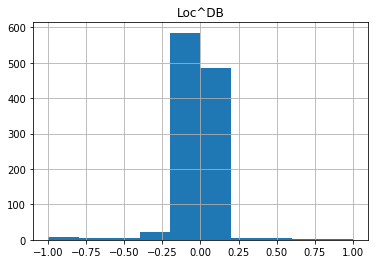

In [41]:
loc_group_explanations.hist(['Loc^DB'], range=[-1, 1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ce8a0b8>]],
      dtype=object)

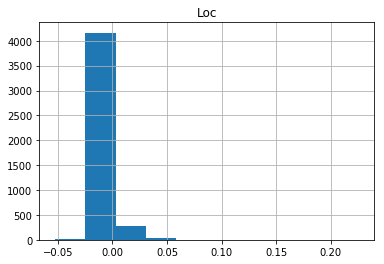

In [42]:
loc_group_explanations.hist(['Loc'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12502c320>]],
      dtype=object)

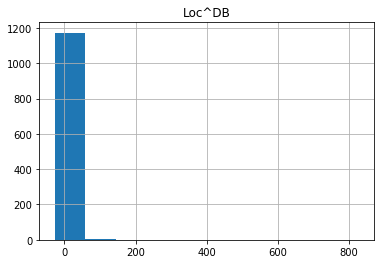

In [43]:
loc_group_explanations.hist(['Loc^DB'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12506ea20>]],
      dtype=object)

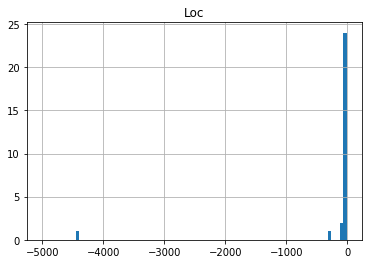

In [44]:
loc_group_explanations.hist(['Loc'], range=[-5000, -10], bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125021c88>]],
      dtype=object)

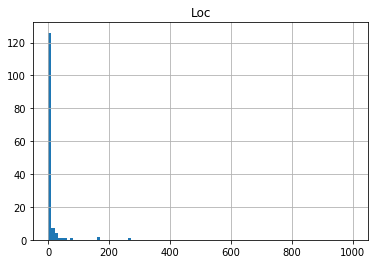

In [45]:
loc_group_explanations.hist(['Loc'], range=[1, 1000], bins=100)

In [46]:
loc_group_explanations['Loc'][loc_group_explanations['Loc'] < 0].count()

2681

In [47]:
loc_group_explanations['Loc'][loc_group_explanations['Loc'] >= 0].count()

1818

In [57]:
for morpho_tag in ['Loc', 'Loc^DB']:
    below_zero = loc_group_explanations[morpho_tag][loc_group_explanations[morpho_tag] < 0].count()
    above_zero = loc_group_explanations[morpho_tag][loc_group_explanations[morpho_tag] >= 0].count()
    print(morpho_tag, below_zero, above_zero)

Loc 2681 1818
Loc^DB 653 523


# ORG type entities - analysis

In [47]:
org_group_explanations = explanations[explanations['entity_type'] == "ORG"].drop(["sentence_idx", "entity_type", "entity_start", "entity_end"], axis=1)

In [48]:
org_group_explanations.mean().sort_values(ascending=False)

Clitic=Kin           0.000727
Derivation=U         0.000240
Polarity=Neg         0.000226
Derivation=Ttain     0.000209
Case=Gen             0.000204
Derivation=Ja        0.000204
Person=3             0.000201
Clitic=Kaan          0.000199
Number[psor]=Sing    0.000184
Case=All             0.000176
Person[psor]=1       0.000171
Style=Coll           0.000170
Typo=Yes             0.000169
Derivation=Ton       0.000167
Foreign=Yes          0.000164
NumType=Card         0.000158
Degree=Pos           0.000158
Number[psor]=Plur    0.000158
PronType=Ind         0.000156
Tense=Past           0.000155
Derivation=Inen      0.000153
Voice=Act            0.000153
Mood=Ind             0.000152
Person=0             0.000149
Person[psor]=2       0.000149
Derivation=Lainen    0.000148
Connegative=Yes      0.000148
Tense=Pres           0.000147
Reflex=Yes           0.000146
AdpType=Post         0.000144
                       ...   
Clitic=Ko,S          0.000109
InfForm=2            0.000107
Derivation

# PER type entities - analysis

In [49]:
per_group_explanations = explanations[explanations['entity_type'] == "PER"].drop(["sentence_idx", "entity_type", "entity_start", "entity_end"], axis=1)

In [50]:
per_group_explanations.mean().sort_values(ascending=False)

Number=Sing          0.007034
Case=Nom             0.003130
InfForm=3            0.000520
Case=Gen             0.000102
Clitic=Han          -0.000024
Derivation=Ja       -0.000098
Style=Coll          -0.000106
Mood=Imp            -0.000129
Case=Abe            -0.000157
Degree=Pos          -0.000176
Abbr=Yes            -0.000189
*UNKNOWN*           -0.000197
Derivation=Ton      -0.000212
InfForm=2           -0.000229
PronType=Prs        -0.000234
PronType=Rcp        -0.000236
PartForm=Neg        -0.000239
Clitic=Kin          -0.000260
Foreign=Yes         -0.000261
Derivation=Inen     -0.000265
VerbForm=Inf        -0.000265
Mood=Ind            -0.000265
Case=Acc            -0.000267
VerbForm=Fin        -0.000274
AdpType=Prep        -0.000282
Person=1            -0.000286
Typo=Yes            -0.000294
PronType=Ind        -0.000294
Derivation=Lainen   -0.000296
Person=2            -0.000298
                       ...   
Clitic=Pa           -0.000353
Mood=Cnd            -0.000355
Derivation

In [ ]:
!pwd

In [ ]:
!ls ../../explanations-for-ner-train-finnish-201901*